# Automatic Detection of Hot-Rolled Steel Strips Surface Defects using Convolutional Neural Network
#### This project aims to automatically detect surface defects in Hot-Rolled Steel Strips such as rolled-in scale, patches, crazing, pitted surface, inclusion and scratches (as depicted in the image below). A Convolutional Neural Network Model is developed and trained on the NEU Metal Surface Defects Database which contains 1800 grayscale images with 300 samples of each of the six different kinds of surface defects.

## 1. Importing Relevant Libraries

In [3]:
!pip install np_utils

     ---------------------------------------- 0.0/62.0 kB ? eta -:--:--
     ---------------------------------------- 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56448 sha256=cefaa1b29bcc0afec9bc98ded9805856c5e90bca8dd64268ab5cd63c675e9be7
  Stored in directory: c:\users\kieutien\appdata\local\pip\cache\wheels\19\0d\33\eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.5 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.6 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.6 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/10.6 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.6 MB 4.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.6 MB 4.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.6 MB 4.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.6 MB 4.7 MB/s eta 0:00:02
   ---

In [9]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img

## 2. Importing the NEU Metal Surface Defect Dataset

In [12]:
train_dir = 'C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/train'
val_dir = 'C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/valid'
test_dir='C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/test'
print("Path: ",os.listdir("C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data"))
print("Train: ",os.listdir("C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/train"))
print("Test: ",os.listdir("C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/test"))
print("Validation: ",os.listdir("C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/Data/valid"))

Path:  ['test', 'train', 'valid']
Train:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


#### For each Class, the Training Data includes 276 Images, Validation & Test sets have 12 images each.

In [13]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


## 3. Data Pre-processing

In [14]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


#### Setting upper Limit of Max 98% training accuracy

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

## 4. Defining the CNN Architecture

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

C:\Users\kieutien\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 199, 199, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
!pip install pydot

In [21]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 5. Training the Defined CNN Model

In [22]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20


C:\Users\kieutien\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 86s 498ms/step - accuracy: 0.2327 - loss: 2.1135 - val_accuracy: 0.6389 - val_loss: 1.2415
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 57s 338ms/step - accuracy: 0.4940 - loss: 1.2776 - val_accuracy: 0.9444 - val_loss: 0.4925
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.6875 - loss: 0.8848 - val_accuracy: 0.8750 - val_loss: 0.4584
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 52s 308ms/step - accuracy: 0.7835 - loss: 0.6565 - val_accuracy: 0.9306 - val_loss: 0.2578
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 51s 303ms/step - accuracy: 0.8198 - loss: 0.5540 - val_accuracy: 0.9306 - val_loss: 0.2803
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.8456 - loss: 0.4718 - val_accuracy: 0.9861 - val_loss: 0.1164
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 55s 324ms/step - accuracy: 0.8569 - loss: 0.4127 - val_accuracy: 0.8889 - val_loss: 0.2569
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 59s 347ms/step - accuracy: 0.8614 - loss: 0.4258 - val

## 6. Analysing the Accuracy & the Loss Curves

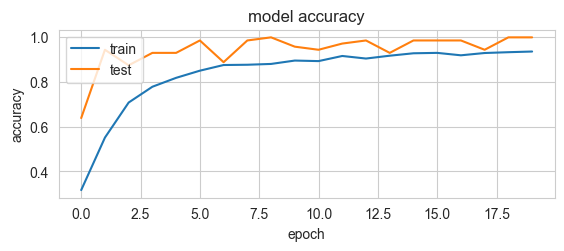

In [23]:
sns.set_style("whitegrid")
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

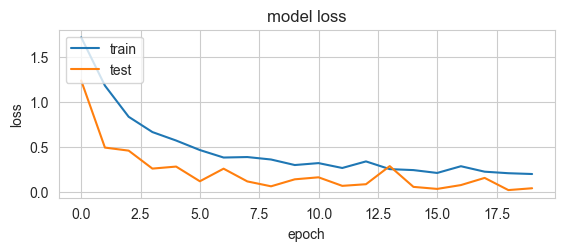

In [24]:
sns.set_style("whitegrid")
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 7. Test Result visualization

In [38]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [39]:
#y_test = np_utils.to_categorical(y_test,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

In [40]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [41]:
x_test = x_test.astype('float32')/255

## Results of Hot-Rolled Steel Strips Surface Defect Detection

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step


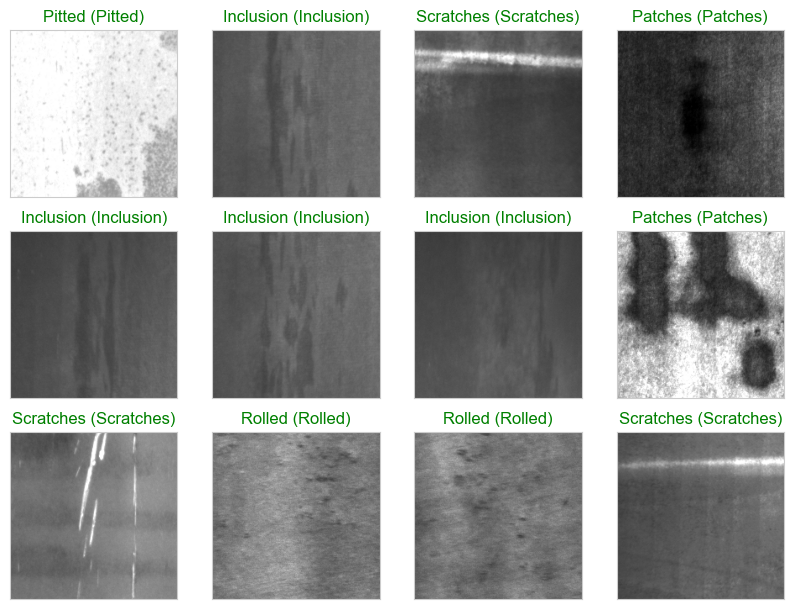

In [43]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [30]:
model.save('C:/Users/kieutien/Downloads/Surface-Defect-Detection/Surface-Defect-Detection/surface_defect_detection_model.h5')

In [32]:
class_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']  # Example labels

# Save the labels to a text file
with open('labels.txt', 'w') as f:
    for label in class_labels:
        f.write("%s\n" % label)

print("Labels saved to labels.txt.")

Labels saved to labels.txt.


In [31]:
import os
print(os.listdir('.'))

['.DS_Store', '.ipynb_checkpoints', 'CNN Model.png', 'Data', 'Hot Rolled Steel Surface Defect Detection.ipynb', 'hot_rolled_steel_surface_defect_detection.py', 'LICENSE', 'Model Accuracy.png', 'Model Loss.png', 'README.md', 'Results.png', 'Surface Defects.png', 'surface_defect_detection_model.h5', 'Untitled.ipynb']
